# Feature importance

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_excel("data_cleaned.xlsx")
data = data.drop(data.columns[5], axis=1)# to je zelo slaba koda
data = data.drop('Unnamed: 0', axis=1)
data = data.apply(pd.to_numeric, errors='coerce')

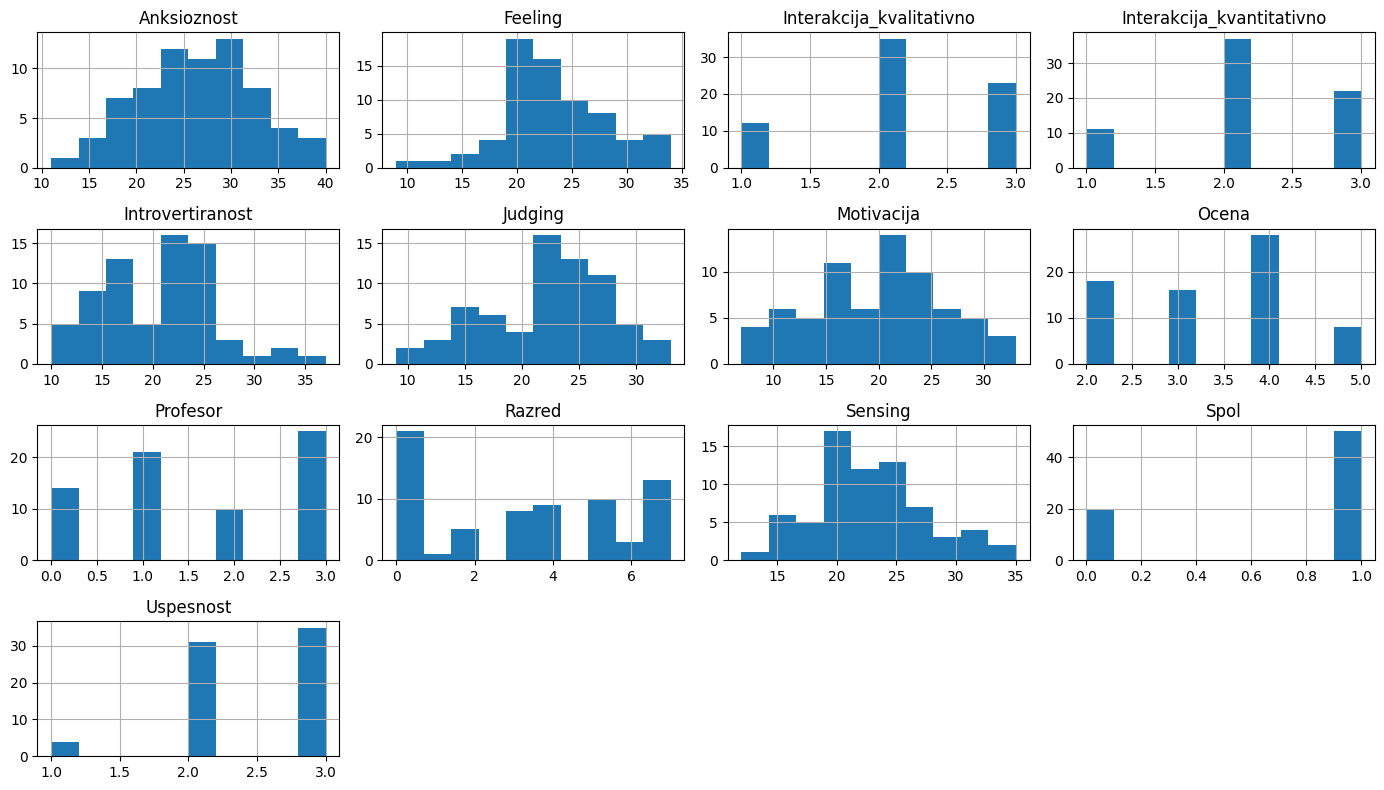

In [2]:
exclude = ['Unnamed: 0']
data.loc[:, data.columns.difference(exclude)].hist(figsize=(14,8))
plt.tight_layout()
plt.show()

In [3]:
X = data.drop("Uspesnost", axis=1)
y = data["Uspesnost"]

In [4]:
X.head()

,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,5,3,3,0,1,0,17,27,19,17,25,26
1,2,3,2,0,1,0,20,22,20,31,33,20
2,4,2,2,0,1,0,27,30,25,25,25,23
3,2,2,2,0,1,0,20,17,21,25,34,25
4,4,2,2,0,1,1,21,24,23,23,20,24


Text(0.5, 1.0, 'Mutual information between predictors and target')

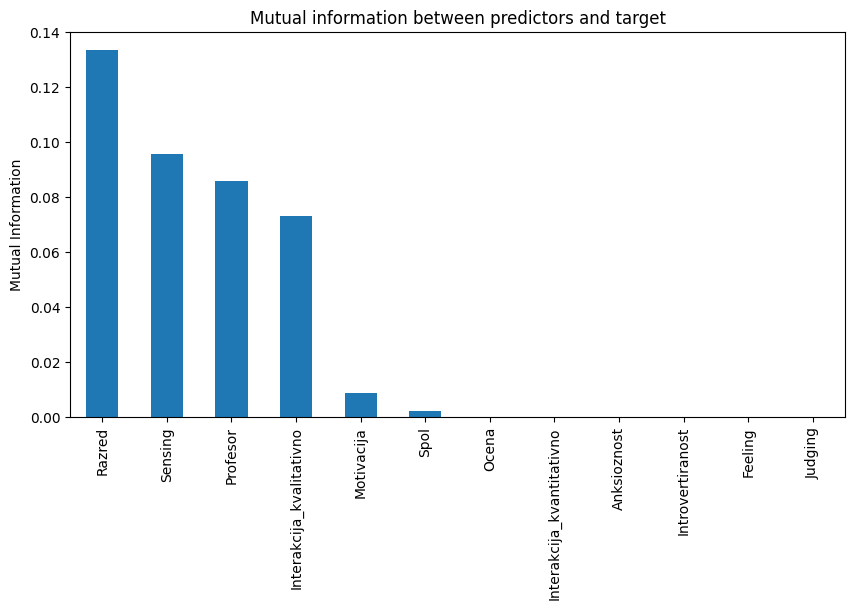

In [5]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y, discrete_features=[3,4,5])

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [6]:
mi.sort_values(ascending=False)

Razred                       0.133428
Sensing                      0.095621
Profesor                     0.085740
Interakcija_kvalitativno     0.073185
Motivacija                   0.008496
Spol                         0.002011
Ocena                        0.000000
Interakcija_kvantitativno    0.000000
Anksioznost                  0.000000
Introvertiranost             0.000000
Feeling                      0.000000
Judging                      0.000000
dtype: float64

In [7]:
"""#discrete_features = X.dtypes == int
discrete_features =[3,4,5]
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)"""

'#discrete_features = X.dtypes == int\ndiscrete_features =[3,4,5]\nfrom sklearn.feature_selection import mutual_info_regression\n\ndef make_mi_scores(X, y, discrete_features):\n    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)\n    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)\n    mi_scores = mi_scores.sort_values(ascending=False)\n    return mi_scores\n\nmi_scores = make_mi_scores(X, y, discrete_features)\n\ndef plot_mi_scores(scores):\n    scores = scores.sort_values(ascending=True)\n    width = np.arange(len(scores))\n    ticks = list(scores.index)\n    plt.barh(width, scores)\n    plt.yticks(width, ticks)\n    plt.title("Mutual Information Scores")\n\n\nplt.figure(dpi=100, figsize=(8, 5))\nplot_mi_scores(mi_scores)'

# Korelacijska matrika

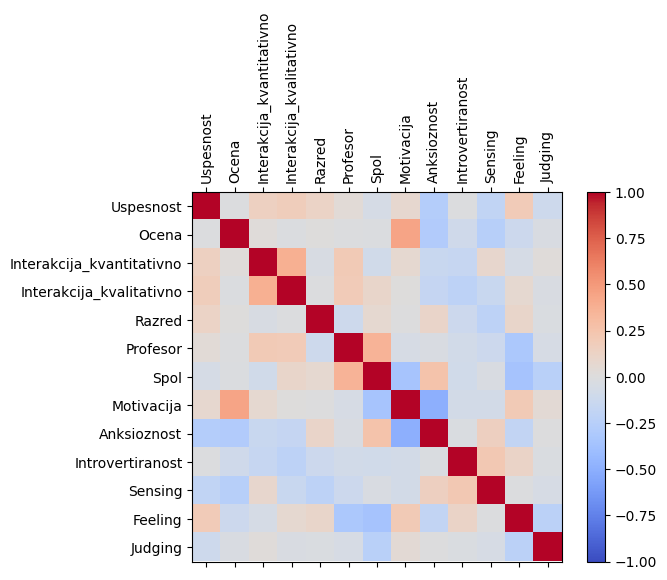

In [8]:
import matplotlib.pyplot as plt

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

# Hi kvadrat

Za tega mora biti data kategoricna. To lahko naredimo z dajanjem psiholoskih 0-100 v klase 0-24, 25-39, ...

In [9]:
"""import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['Spol','Glavna_diagnoza', 'starost']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="responder" )"""

'import pandas as pd\nimport numpy as np\nimport scipy.stats as stats\nfrom scipy.stats import chi2_contingency\n\nclass ChiSquare:\n    def __init__(self, dataframe):\n        self.df = dataframe\n        self.p = None #P-Value\n        self.chi2 = None #Chi Test Statistic\n        self.dof = None\n        \n        self.dfObserved = None\n        self.dfExpected = None\n        \n    def _print_chisquare_result(self, colX, alpha):\n        result = ""\n        if self.p<alpha:\n            result="{0} is IMPORTANT for Prediction".format(colX)\n        else:\n            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)\n\n        print(result)\n        \n    def TestIndependence(self,colX,colY, alpha=0.05):\n        X = self.df[colX].astype(str)\n        Y = self.df[colY].astype(str)\n        \n        self.dfObserved = pd.crosstab(Y,X) \n        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)\n        self.p = p\n        self.c

In [10]:
"""data.dtypes"""

'data.dtypes'

RFE 
https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # or any model you prefer
import pandas as pd

# Assuming X contains your features (both categorical and continuous)
# and y contains your target variable

model = LogisticRegression()  # Replace this with any model you prefer
num_features_to_select = 3  # Select the number of features you want
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get ranking of features
feature_ranking = rfe.ranking_

# Get selected feature names and their rankings
selected_features = X.columns[selected_indices]  # Assuming X is a pandas DataFrame
selected_features_ranking = {feat: rank for feat, rank in zip(X.columns, feature_ranking)}

# Transform X to include only selected features
X_selected = X.iloc[:, selected_indices]

# Now you can use X_selected for modeling with selected features

# Print selected features and their rankings
print("Selected Features and Their Rankings:")
for feature, rank in selected_features_ranking.items():
    print(f"Feature: {feature}, Rank: {rank}")

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected Features and Their Rankings:
Feature: Ocena, Rank: 10
Feature: Interakcija_kvantitativno, Rank: 1
Feature: Interakcija_kvalitativno, Rank: 1
Feature: Razred, Rank: 4
Feature: Profesor, Rank: 1
Feature: Spol, Rank: 5
Feature: Motivacija, Rank: 8
Feature: Anksioznost, Rank: 3
Feature: Introvertiranost, Rank: 9
Feature: Sensing, Rank: 6
Feature: Feeling, Rank: 2
Feature: Judging, Rank: 7


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

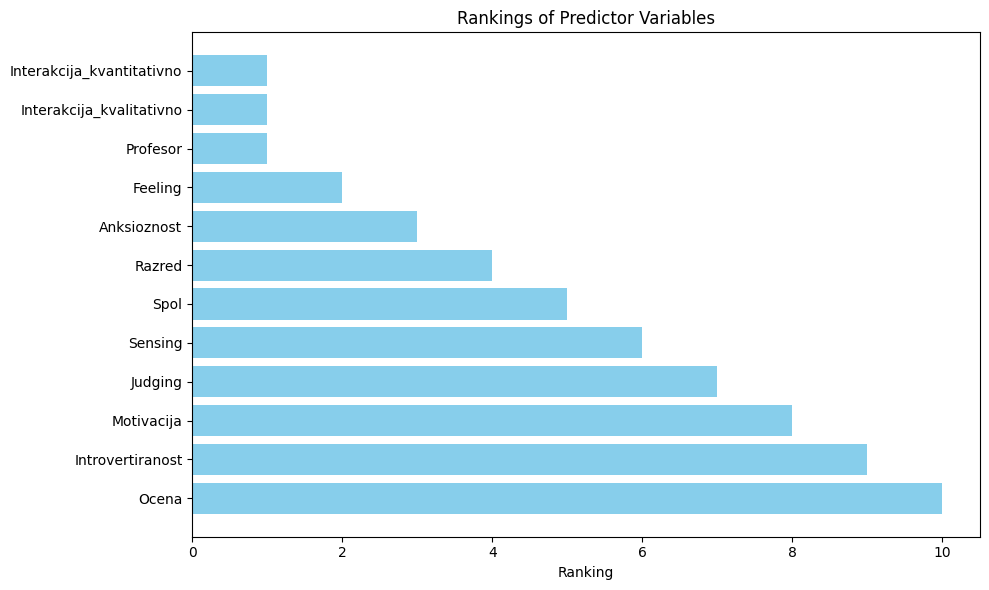

In [12]:
# Assuming selected_features_ranking is already computed as in your previous code

# Sort the features by their ranking
sorted_features = sorted(selected_features_ranking.items(), key=lambda x: x[1])

# Extract feature names and their rankings
features = [feat for feat, _ in sorted_features]
ranks = [rank for _, rank in sorted_features]

# Plotting the ranks of predictor variables
plt.figure(figsize=(10, 6))
plt.barh(features, ranks, color='skyblue')
plt.xlabel('Ranking')
plt.title('Rankings of Predictor Variables')
plt.gca().invert_yaxis()  # Invert y-axis to display highest-ranked features at the top
plt.tight_layout()
plt.show()

In [13]:
df=data
list(df.columns)

['Uspesnost',
 'Ocena',
 'Interakcija_kvantitativno',
 'Interakcija_kvalitativno',
 'Razred',
 'Profesor',
 'Spol',
 'Motivacija',
 'Anksioznost',
 'Introvertiranost',
 'Sensing',
 'Feeling',
 'Judging']

In [14]:
data = df
selected_columns = ['Uspesnost',
 'Ocena',
 'Interakcija_kvantitativno',
 'Interakcija_kvalitativno',
 'Motivacija',
 'Anksioznost',
 'Introvertiranost',
 'Sensing',
 'Feeling',
 'Judging']
data = data[selected_columns]

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(method='minres')

# Fit the factor analysis model to your data
fa.fit(data)

# Calculate factor loadings
loadings = fa.loadings_

# Calculate error variances (unique variances)
# Error variance = 1 - (factor loading)^2
error_variances = 1 - np.square(loadings)

# Calculate McDonald's Omega
omega = 1 - (np.sum(error_variances) / np.sum(1 + error_variances))

print("McDonald's Omega:")
print(omega)


McDonald's Omega:
0.5304386912693841


In [15]:
import pingouin as pg

data = df
selected_columns = ['Uspesnost',
 'Ocena',
 'Interakcija_kvantitativno',
 'Interakcija_kvalitativno',
 'Motivacija',
 'Anksioznost',
 'Introvertiranost',
 'Sensing',
 'Feeling',
 'Judging']
data = data[selected_columns]

pg.cronbach_alpha(data=data)

(-0.38378063549330366, array([-0.923,  0.053]))

In [16]:
import pandas as pd
from scipy.stats import kendalltau

data = df

def gutman_lambda(df, columns):
    corr_matrix = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            corr, _ = kendalltau(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = corr
    
    lambda_val = 1 - (1 / (len(columns) * (len(columns) - 1))) * sum([sum([corr_matrix.loc[col1, col2] for col2 in columns]) for col1 in columns])
    return lambda_val

# Example usage:
# Assuming 'df' is your pandas DataFrame and 'cols' is a list of columns containing categorical data
lambda_value = gutman_lambda(df, ["Razred", "Spol", "Profesor"])
print("Gutman's Lambda:", lambda_value)

Gutman's Lambda: 0.4075261355183406
